In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv")

In [6]:
gdp_df.shape

(8219, 4)

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


In [8]:
gdp_df.head

<bound method NDFrame.head of      Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2023  1992.424394              NaN
1        Afghanistan  2022  1981.710168              NaN
2        Afghanistan  2021  2144.166570              NaN
3        Afghanistan  2020  2769.685745              NaN
4        Afghanistan  2019  2927.245144              NaN
...              ...   ...          ...              ...
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN

[8219 rows x 4 columns]>

In [9]:
gdp_df.drop(columns = ['Value Footnotes'])

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [10]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country','Value':'GDP_Per_Capita'})

In [11]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [12]:
country_count=gdp_df.Country.value_counts()
country_count

Country
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64

Latvia, North America, Mongolia, Morocco, and Mozambique have data for all years

In [14]:
gdp_df.Year.value_counts()

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

gdp_df['Year'] = '2020'

In [16]:
countries_with_34 =country_count[country_count == 34]
print(countries_with_34)

Country
Latvia                                34
North America                         34
Mongolia                              34
Morocco                               34
Mozambique                            34
                                      ..
Ghana                                 34
Greece                                34
Equatorial Guinea                     34
Grenada                               34
Europe & Central Asia (IDA & IBRD)    34
Name: count, Length: 228, dtype: int64


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

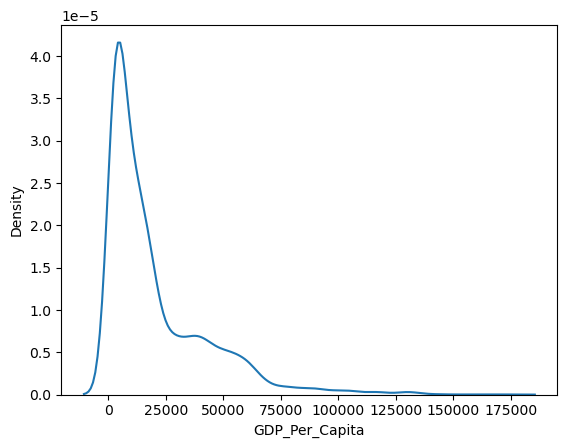

In [17]:
sns.kdeplot(data=gdp_df, x='GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

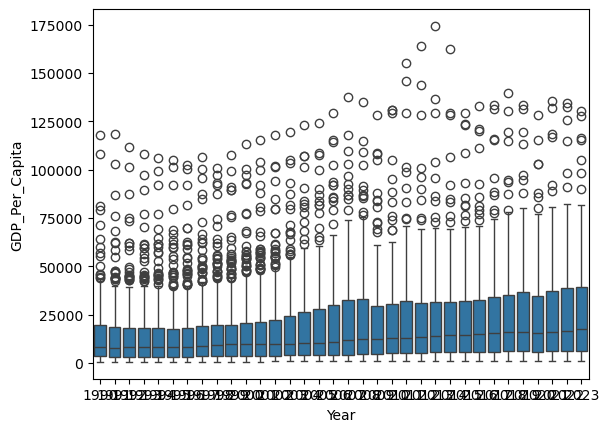

In [18]:
sns.boxplot(x=gdp_df["Year"], y=gdp_df["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

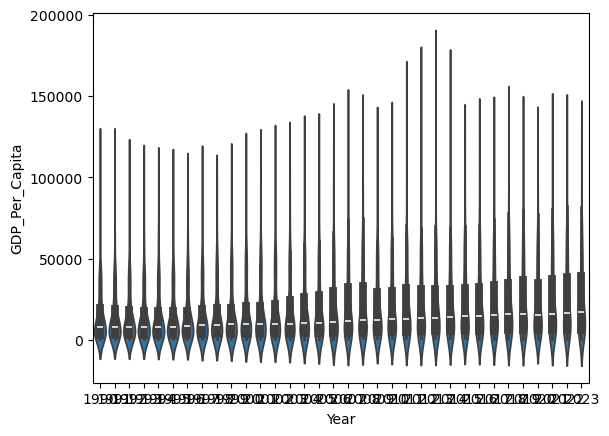

In [19]:
sns.violinplot(x=gdp_df["Year"], y=gdp_df["GDP_Per_Capita"])

In [20]:
gdp_df.describe()

,Year,GDP_Per_Capita
count,8219.000000,8219.000000
mean,2006.672345,20270.976242
std,9.782986,22532.004246
min,1990.000000,510.822823
25%,1998.000000,4284.868430
50%,2007.000000,11916.457927
75%,2015.000000,28543.305542
max,2023.000000,174339.077325


11916.457927

In [22]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [23]:
gdp_df = gdp_df.astype({'Year': int})

In [24]:
decades = [1990,2000,2010,2020]

In [25]:
gdp_decades = gdp_df.loc[gdp_df['Year'].isin(decades)]

In [26]:
print(gdp_df.dtypes)

Country            object
Year                int32
GDP_Per_Capita    float64
dtype: object


In [27]:
print(gdp_decades)

                          Country  Year  GDP_Per_Capita
3                     Afghanistan  2020     2769.685745
13                    Afghanistan  2010     2848.586061
23                    Afghanistan  2000     1617.826475
27    Africa Eastern and Southern  2020     3861.111238
37    Africa Eastern and Southern  2010     3863.836012
...                           ...   ...             ...
8184                       Zambia  1990     2425.111287
8188                     Zimbabwe  2020     2987.269823
8198                     Zimbabwe  2010     2572.769992
8208                     Zimbabwe  2000     4071.022001
8218                     Zimbabwe  1990     4013.299059

[965 rows x 3 columns]


In [28]:
gdp_decades.sort_values(by = 'Year', ascending = False)

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
2051,Egypt,2020,15309.235988
2017,Ecuador,2020,12425.017545
5303,Netherlands,2020,64803.640102
5337,New Zealand,2020,46055.809283
...,...,...,...
5571,Norway,1990,57055.326086
1843,Dominica,1990,10409.117737
5537,North Macedonia,1990,12892.860973
1877,Dominican Republic,1990,7283.265144


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

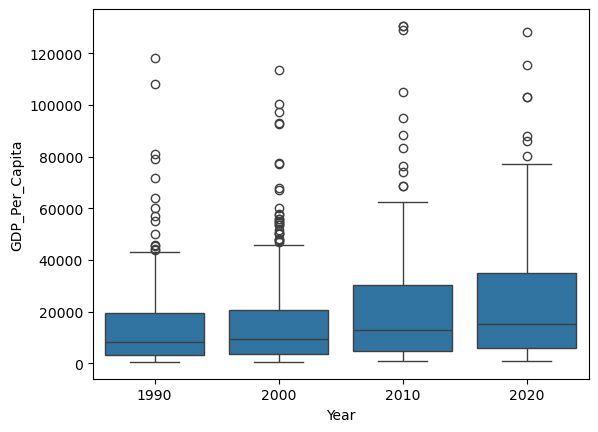

In [29]:
sns.boxplot(x=gdp_decades['Year'],y=gdp_decades['GDP_Per_Capita'])

In [30]:
sns.set_theme(style="darkgrid")

In [31]:
plt.figure(figsize=(10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

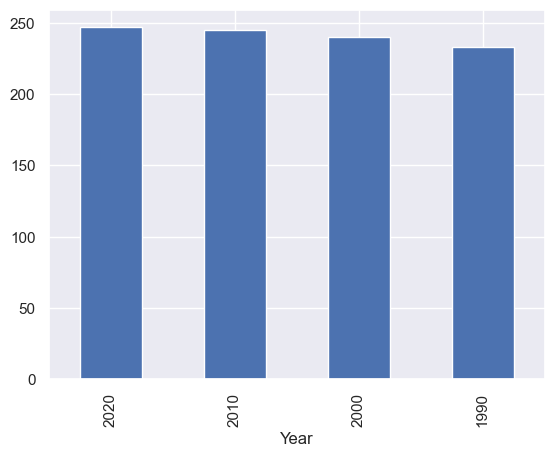

In [32]:
decades = [1990,2000,2010,2020]
gdp_decades = gdp_df.loc[gdp_df.Year.isin(decades)]
gdp_decades['Year'].value_counts().plot(kind = 'bar');

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

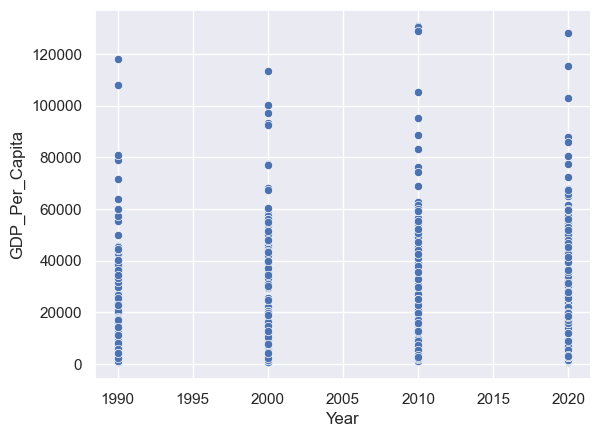

In [33]:
sns.scatterplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

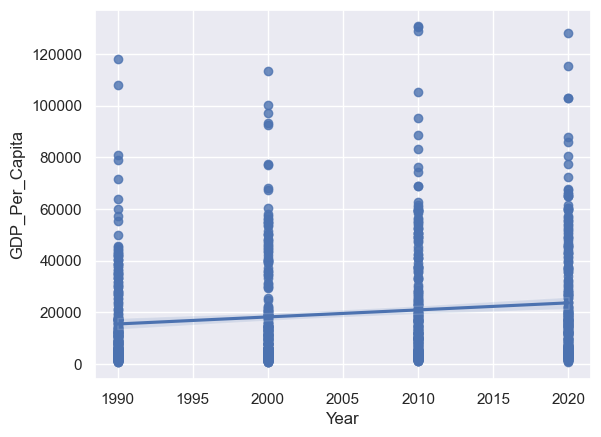

In [34]:
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

gdp went up over time

In [36]:
gdp_df.sort_values(by = 'GDP_Per_Capita',  ascending = True)

,Country,Year,GDP_Per_Capita
5161,Mozambique,1992,510.822823
5158,Mozambique,1995,525.418672
4247,Liberia,1995,534.809715
5159,Mozambique,1994,546.209688
5163,Mozambique,1990,547.622781
...,...,...,...
6128,Qatar,2011,145591.019357
4469,"Macao SAR, China",2011,155185.383338
4466,"Macao SAR, China",2014,162582.374111
4468,"Macao SAR, China",2012,164065.103441


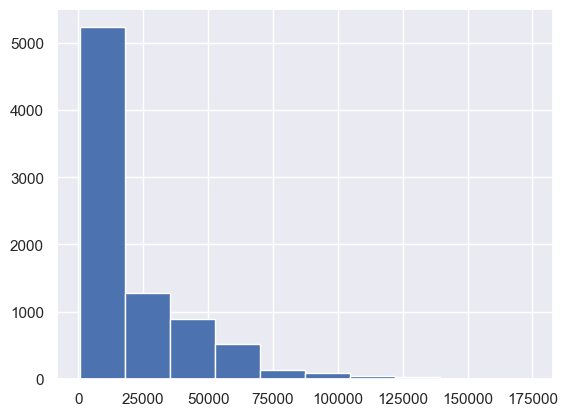

In [37]:
gdp_df['GDP_Per_Capita'].hist();

Which country was the first to have a GDP per capita greater than $100,000?

In [39]:
greaterGDP= gdp_df[gdp_df['GDP_Per_Capita'] >= 100000]

In [40]:
first_country = greaterGDP.sort_values('Year').iloc[0]
print("First country with GDP per capita over $100,000:")
print(first_country[['Country', 'Year', 'GDP_Per_Capita']])

First country with GDP per capita over $100,000:
Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           108057.042464
Name: 7827, dtype: object


In [41]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

In [42]:
highest_gdp_2020 = gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmax()]

In [127]:
country_highest_gdp = highest_gdp_2020['Country']
print(country_highest_gdp)

Luxembourg


In [44]:
country_data = gdp_df[gdp_df['Country'] == country_highest_gdp]

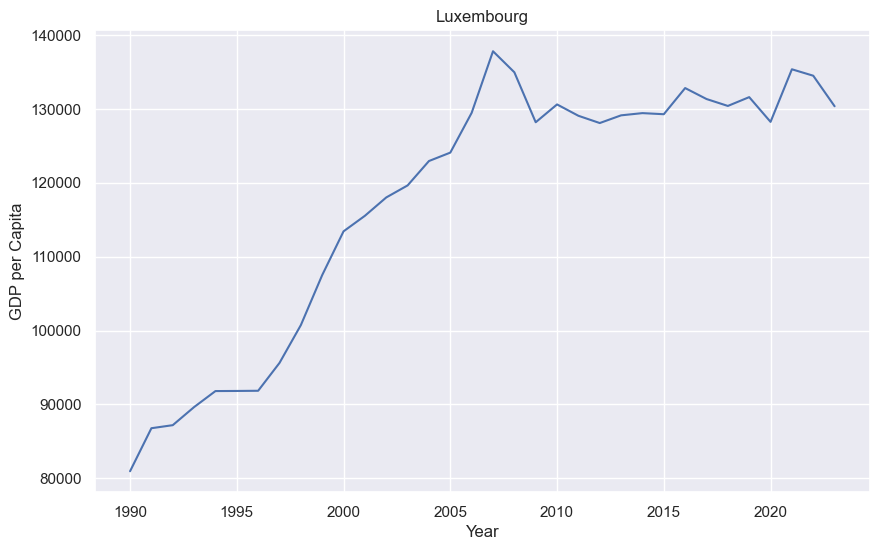

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(country_data['Year'], country_data['GDP_Per_Capita'])
plt.title('Luxembourg')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.grid(True)
plt.show()

In [46]:
lowest_gdp_2020 = gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmin()]

In [47]:
country_lowest_gdp = lowest_gdp_2020['Country']
print(f"The country with the lowest GDP per capita in 2020 is {country_lowest_gdp}.")

The country with the lowest GDP per capita in 2020 is Burundi.


In [48]:
country_data = gdp_df[gdp_df['Country'] == country_lowest_gdp]

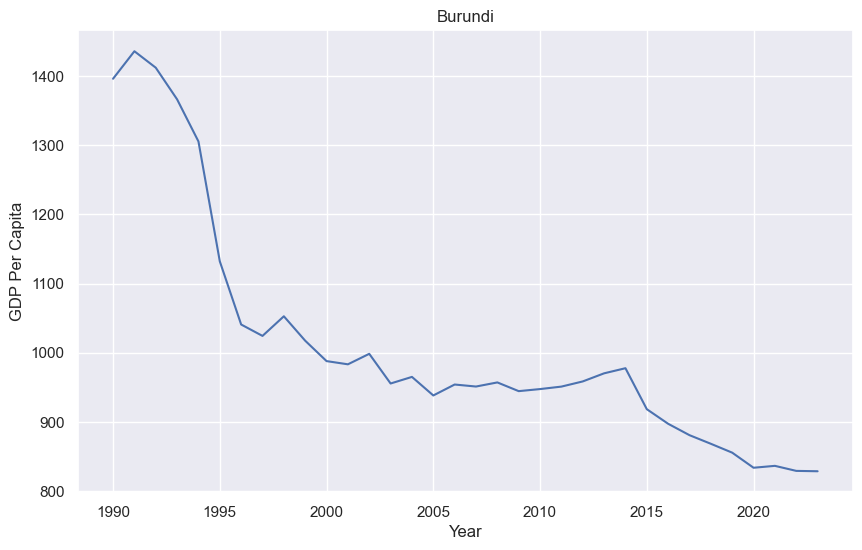

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(country_data['Year'], country_data['GDP_Per_Capita'])
plt.title('Burundi')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.grid(True)
plt.show()

In [50]:
internet_df = pd.read_csv("../data/internet_use.csv", nrows = 6083)

In [51]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


In [52]:
internet_df = internet_df.drop(columns=['Value Footnotes'])

In [53]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year',
 'Value': 'Internet_Users_Pct'})

In [54]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [55]:
internet_df.Year.value_counts()

Year
1990    226
2007    217
2011    214
2008    214
2009    214
2002    214
2006    212
2001    212
2005    212
2004    210
2000    210
2010    209
2012    209
2003    208
1999    207
2016    206
2017    205
2014    204
2015    203
2013    203
1998    195
1997    188
2021    186
2020    186
2019    185
2022    184
1996    177
2018    174
1995    141
1994     92
1993     66
1992     50
1991     39
2023     11
Name: count, dtype: int64

In [56]:
observations = internet_df.groupby('Year').size()

In [57]:
print(observations)

Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
dtype: int64


In [58]:
non_zero_internet_df = internet_df[internet_df['Internet_Users_Pct'] > 0]

In [59]:
non_zero_year = non_zero_internet_df['Year'].min()

In [60]:
print({non_zero_year})

{1990}


In [61]:
data_2000 = internet_df[internet_df['Year'] == 2000]

In [62]:
data_2014 = internet_df[internet_df['Year'] == 2014]

In [63]:
concat_data = pd.concat([data_2000, data_2014])

In [64]:
concat_data

,Country,Year,Internet_Users_Pct
42,Albania,2000,0.114097
71,Algeria,2000,0.491706
100,Andorra,2000,10.538800
128,Angola,2000,0.105046
150,Anguilla,2000,22.405400
...,...,...,...
5937,Viet Nam,2014,41.000000
5960,Virgin Islands (US),2014,50.070000
6003,Yemen,2014,22.550000
6031,Zambia,2014,6.500000


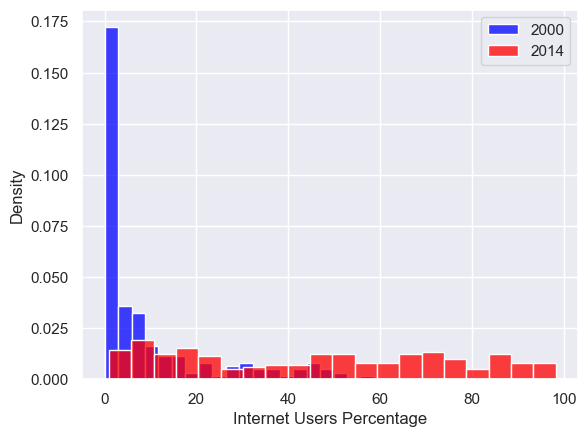

In [65]:
sns.histplot(data_2000['Internet_Users_Pct'], color='blue', label='2000', bins=20, stat='density')
sns.histplot(data_2014['Internet_Users_Pct'], color='red', label='2014', bins=20, stat='density')
plt.xlabel('Internet Users Percentage')
plt.ylabel('Density')
plt.legend()
plt.show()

In [129]:
less_than_5 = data_2014[data_2014['Internet_Users_Pct'] < 5]

In [137]:
print(less_than_5)

                               Country  Year  Internet_Users_Pct
873                            Burundi  2014             1.04239
1033          Central African Republic  2014             2.70000
1061                              Chad  2014             2.90000
1517  Democratic Republic of the Congo  2014             3.00000
1782                           Eritrea  2014             0.99000
2451                     Guinea-Bissau  2014             3.32000
3364                        Madagascar  2014             3.70000
4073                             Niger  2014             1.24868
5055                           Somalia  2014             1.63000
5116                       South Sudan  2014             2.60000


In [141]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df)

In [143]:
print(gdp_and_internet_use)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
0     Afghanistan  2019     2927.245144           17.600000
1     Afghanistan  2018     2902.392113           16.800000
2     Afghanistan  2017     2952.998916           13.500000
3     Afghanistan  2016     2958.785399           11.000000
4     Afghanistan  2015     2967.692067            8.260000
...           ...   ...             ...                 ...
4798     Zimbabwe  1997     4304.406272            0.033080
4799     Zimbabwe  1996     4271.479930            0.016790
4800     Zimbabwe  1995     3935.280057            0.007684
4801     Zimbabwe  1994     3965.730986            0.001739
4802     Zimbabwe  1990     4013.299059            0.000000

[4803 rows x 4 columns]


In [151]:
sorted_2014 = data_2014.sort_values(by = 'Internet_Users_Pct', ascending = False)

In [153]:
sorted_2014.head(3)

,Country,Year,Internet_Users_Pct
2592,Iceland,2014,98.158
1893,Falkland (Malvinas) Islands,2014,97.600
602,Bermuda,2014,96.800


In [157]:
threecountries = gdp_df[gdp_df['Country'].isin(['Iceland','Falkland (Malvinas) Islands', 'Bermuda'])]

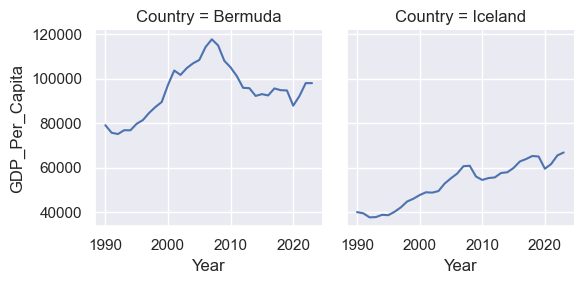

In [163]:
g = sns.FacetGrid(threecountries, col="Country")
g.map(sns.lineplot, "Year", "GDP_Per_Capita")

In [165]:
print(threecountries)

      Country  Year  GDP_Per_Capita
738   Bermuda  2023    98041.688721
739   Bermuda  2022    98057.447098
740   Bermuda  2021    92276.234605
741   Bermuda  2020    87894.401174
742   Bermuda  2019    94755.432811
...       ...   ...             ...
3213  Iceland  1994    38856.472813
3214  Iceland  1993    37829.544274
3215  Iceland  1992    37720.719265
3216  Iceland  1991    39531.470666
3217  Iceland  1990    40081.958967

[68 rows x 3 columns]


In [167]:
gdp_and_internet_use_2014 = gdp_and_internet_use [gdp_and_internet_use ['Year'] == 2014]

<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

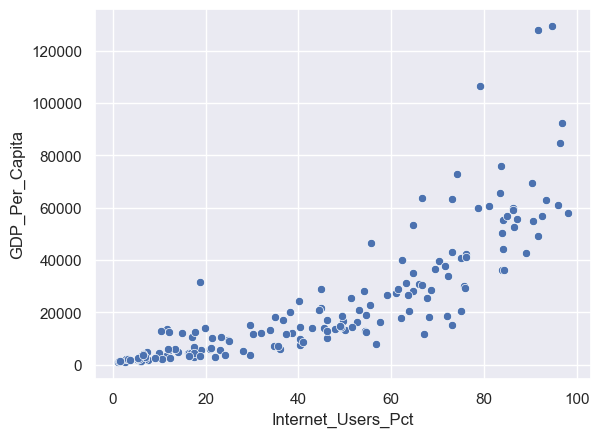

In [171]:
sns.scatterplot(gdp_and_internet_use_2014, x='Internet_Users_Pct', y='GDP_Per_Capita')

In [185]:
gdp_per_capita_2014  = gdp_df[gdp_df['Year'] == 2014]

In [197]:
gdp_per_capita_2014.loc[:,"GDP_group"] = pd.qcut(gdp_per_capita_2014["GDP_Per_Capita"], q=3, labels=["Low", "Medium", "High"])

In [195]:
print(gdp_per_capita_2014)

                               Country  Year  GDP_Per_Capita GDP_group
9                          Afghanistan  2014     3017.942544       Low
33         Africa Eastern and Southern  2014     4052.851526       Low
67          Africa Western and Central  2014     4816.917355       Low
101                            Albania  2014    12788.747231    Medium
135                            Algeria  2014    15073.762940    Medium
...                                ...   ...             ...       ...
8096                West Bank and Gaza  2014     5990.426615       Low
8126                             World  2014    17307.606891    Medium
8160                            Zambia  2014     3585.577485       Low
8194                          Zimbabwe  2014     3360.552173       Low
GDP_group                          NaN   NaN             NaN       NaN

[248 rows x 4 columns]
